In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [98]:
gold_data = pd.read_csv('gld_price_data.csv')

In [99]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [100]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [101]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [102]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [103]:
gold_data.shape

(2290, 6)

In [104]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

# Correlation

In [105]:
corr = gold_data.corr()
corr

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<AxesSubplot:>

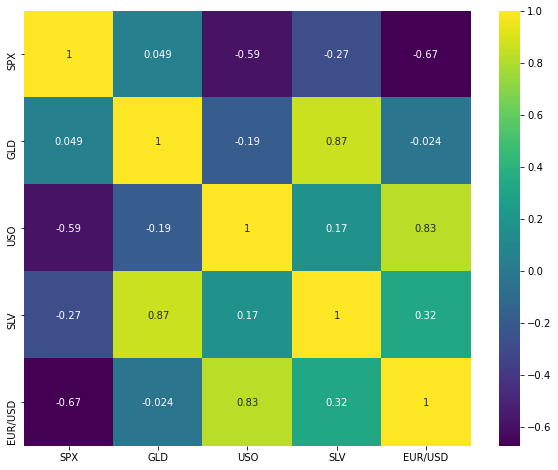

In [106]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='viridis')

In [107]:
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


# check the distribution of the Gold price

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

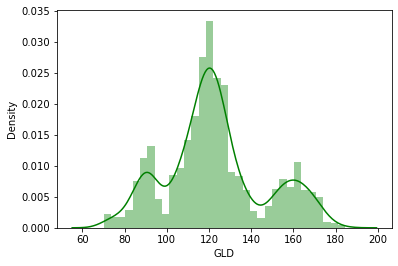

In [108]:
sns.distplot(gold_data['GLD'],color='green')

# Split the data

In [109]:
X = gold_data.drop(columns=['Date','GLD'],axis=1)
y = gold_data['GLD']

In [110]:
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [111]:
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

In [112]:
X.shape,y.shape

((2290, 4), (2290,))

# Train Test Split

In [113]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [114]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1832, 4) (458, 4) (1832,) (458,)


# MODEL TRAINING

In [115]:
model = RandomForestRegressor(n_estimators=100)

In [116]:
model.fit(X_train,y_train)

RandomForestRegressor()

# Model Evaluation

In [117]:
test_data_prediction = model.predict(X_test)

In [118]:
test_data_prediction

array([168.82369921,  82.03339992, 116.14190003, 127.53750064,
       120.71040103, 154.69849776, 150.30449798, 126.06410066,
       117.40049901, 125.96100068, 117.0393006 , 171.55910033,
       141.44879828, 168.00109846, 115.14479985, 117.5159005 ,
       141.20250306, 170.37190114, 159.37100257, 159.56259894,
       155.10320044, 125.26300051, 176.11249983, 156.85910296,
       125.13460037,  93.83630001,  76.89530038, 120.3315998 ,
       119.0849993 , 167.43850017,  88.21660071, 125.16740012,
        91.2083007 , 117.66730024, 121.09299897, 136.74220081,
       115.53870124, 115.10930062, 148.20719991, 107.03890105,
       104.21810261,  87.16979801, 126.52250082, 117.86289996,
       153.04759906, 119.57160014, 108.5939995 , 108.06829819,
        93.20900034, 127.11489782,  75.19610042, 113.57899916,
       121.26740017, 111.42699903, 118.92519888, 120.72699948,
       159.05679984, 168.75780137, 147.13649671,  85.94389862,
        94.52870032,  86.79269897,  90.55950035, 118.87

# R squared error

In [119]:
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R squared error is ",error_score)

R squared error is  0.9893201242901235


# compare the actual and predicted values 

In [120]:
y_test = np.array(y_test)

In [121]:
y_test

array([168.020004,  81.230003, 112.32    , 127.589996, 119.620003,
       154.210007, 148.910004, 126.190002, 117.470001, 125.739998,
       115.379997, 167.119995, 141.630005, 169.559998, 115.599998,
       119.669998, 132.949997, 170.399994, 159.369995, 173.529999,
       154.720001, 128.119995, 177.720001, 157.190002, 125.309998,
        93.400002,  76.790001, 119.690002, 118.989998, 167.389999,
        87.5     , 124.980003,  91.230003, 115.489998, 120.949997,
       133.809998, 116.690002, 113.809998, 133.580002, 105.970001,
       105.120003,  87.959999, 126.82    , 116.860001, 159.259995,
       119.459999, 109.160004, 108.620003,  93.269997, 127.160004,
        72.260002, 113.470001, 119.68    , 109.139999, 119.309998,
       120.050003, 159.889999, 161.490005, 146.740005,  85.809998,
        93.709999,  85.550003,  91.029999, 118.489998, 126.449997,
       126.980003, 171.699997, 122.400002, 116.410004,  97.959999,
       169.630005, 142.639999, 131.809998, 121.360001, 124.   

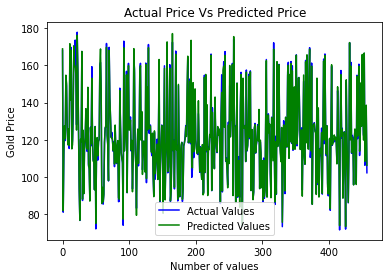

In [122]:
plt.plot(y_test,color='blue',label = 'Actual Values')
plt.plot(test_data_prediction,color='green',label='Predicted Values')
plt.title('Actual Price Vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()